In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
#  Step 1: Generate Sample Data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

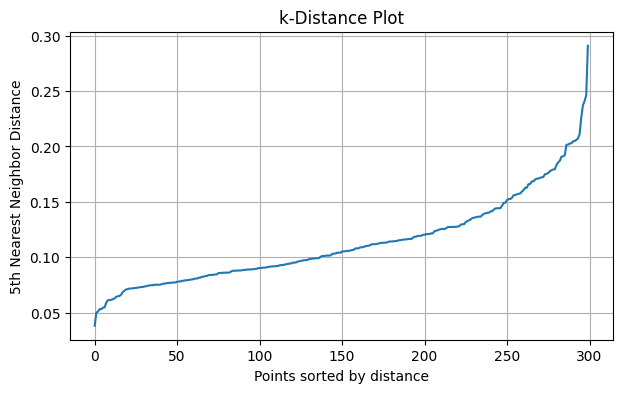

In [4]:
#  Step 2: Find Optimal Epsilon Using k-Distance Plot
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X)
distances, _ = nearest_neighbors.kneighbors(X)
sorted_distances = np.sort(distances[:, -1])

plt.figure(figsize=(7, 4))
plt.plot(sorted_distances)
plt.title('k-Distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

In [5]:
#  Step 3: Apply DBSCAN with Tuned Parameters
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

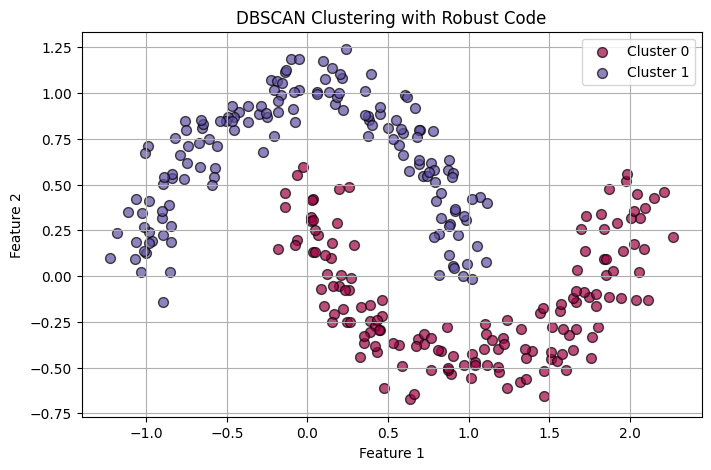

In [6]:
#  Step 4: Plot the Results
plt.figure(figsize=(8, 5))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = [0, 0, 0, 1]  # Black for outliers
        label_name = 'Outliers'
    else:
        label_name = f'Cluster {label}'

    plt.scatter(X[labels == label, 0], X[labels == label, 1],
                color=color, label=label_name, edgecolor='k', s=50, alpha=0.7)

plt.title('DBSCAN Clustering with Robust Code')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()